# About ConnectTel

ConnectTel is a leading telecommunications company at the forefront of innovation and connectivity solutions. With a strong presence in the global market, ConnectTel has established itself as a trusted provider of reliable voice, data, and Internet services. Offering a comprehensive range of telecommunications solutions, including mobile networks, broadband connections, and enterprise solutions, ConnectTel caters to both individual and corporate customers, they are committed to providing exceptional customer service and cutting-edge technology. ConnectTel ensures seamless communication experiences for millions of users worldwide. Through strategic partnerships and a customer-centric approach, ConnectTel continues to revolutionize the telecom industry, empowering individuals and businesses to stay connected and thrive in the digital age.

# Problem Overview
ConnectTel Telecom Company faces the pressing need to address
customer churn, which poses a significant threat to its business
sustainability and growth.
The company's current customer retention strategies lack precision and
effectiveness, resulting in the loss of valuable customers to competitors.
To overcome this challenge, ConnectTel aims to develop a
robust customer churn prediction system for which I was contacted
to handle as a Data Scientist. By leveraging advanced analytics and machine
learning techniques on available customer data, the company seeks to
accurately forecast customer churn and implement targeted retention
initiatives.
This proactive approach will enable ConnectTel to reduce customer
attrition, enhance customer loyalty, and maintain a competitive edge in the
highly dynamic and competitive telecommunications industry.

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\Mumsie\Downloads\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Features in the dataset and meaning:

1. CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
4. Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
6. Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn.
9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn.
11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior.
12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence  of streaming movies on churn behavior.
16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of  paperless billing on customer churn.
18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

In [3]:
# I will transpose the dataframe in order to view the complete features (i.e. rows become columns)

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Cleaning the column names (changing column names to lower case and triming white spaces)

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Next, I will inspect/carry out data verification to ascertain Data type, number of features and rows, missing data, etc

In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


Next, I will convert the feature 'totalcharges' to a number data type

In [9]:
pd.to_numeric(df.totalcharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [10]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')
tc.isnull().sum()

11

11 values are missing so I will investigate what is going on within the dataframe with reference tio the missing values. I will investigate the features 'customerid' and 'totalcharges' for more detail

In [11]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


There are missing values in 'totalcharges', so I will first convert the feature to a numeric data type, and replace these values with 0

In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [13]:
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
#Statistical Analysis of the data

df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


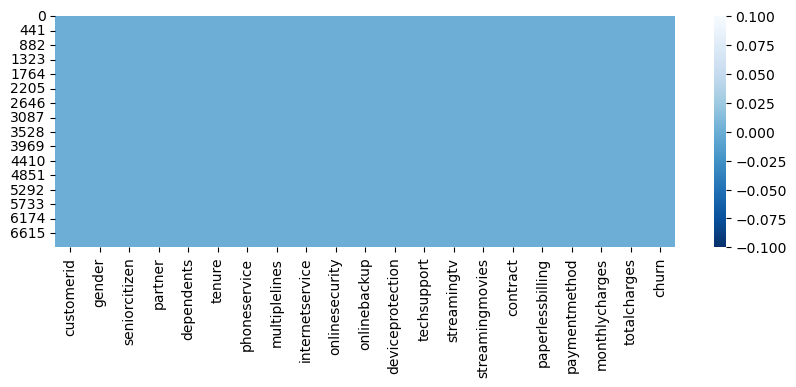

In [15]:
#Next, I will check for missing values, and visualize the missing data

print(df.isna().sum())

plt.figure(figsize = (10,3))
sns.heatmap(df.isna(), cbar=True, cmap='Blues_r');

In [16]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

I will check for outliers in certain columns

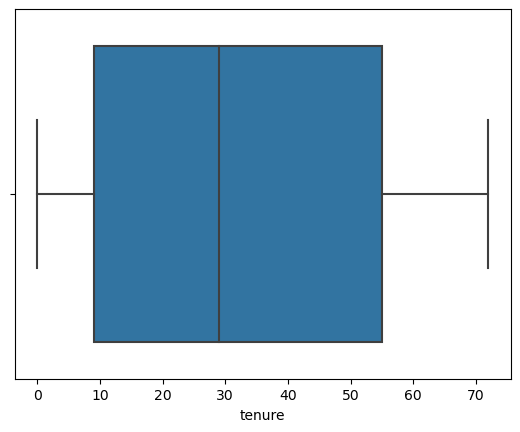

In [17]:
sns.boxplot(x=df['tenure']);

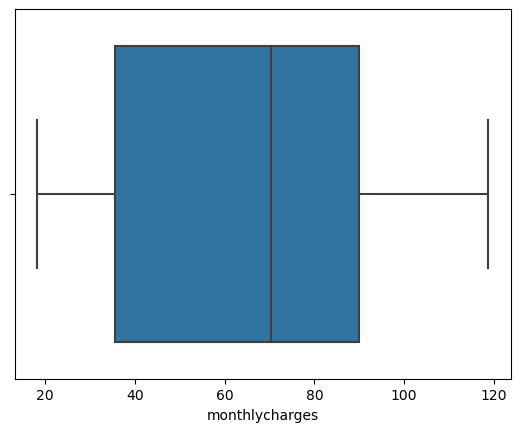

In [18]:
sns.boxplot(x=df['monthlycharges']);

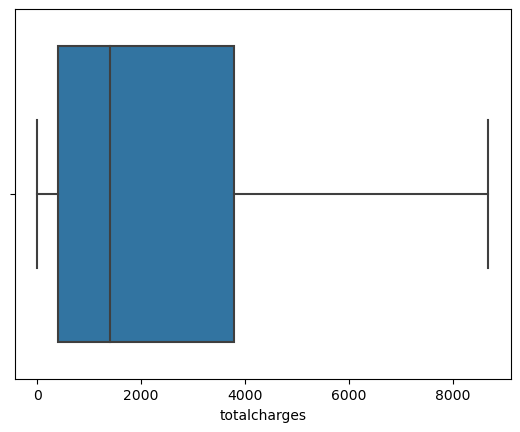

In [19]:
sns.boxplot(x=df['totalcharges']);

> No outliers have been found in the investigated features of the dataset

Next, I will investigate certain features beginning with the senior citizen feature

In [20]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [21]:
def age_group(category):
    if category == 1:
        return 'senior citizen'
    else:
        return 'adult'
    
df['age_group'] = df['seniorcitizen'].apply(age_group)
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,age_group
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no,adult
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,no,no,no,one_year,no,mailed_check,56.95,1889.50,no,adult


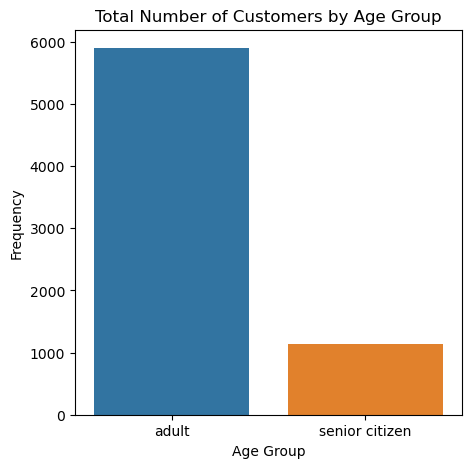

In [22]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['age_group'])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Total Number of Customers by Age Group');

It can be seen that there are fewer senior citizens in the dataset

Next, I will investigate and visualize the tenure column

In [23]:
df['tenure'].min()

0

In [24]:
df['tenure'].max()

72

In [25]:
def tenure_category(months):
    if months <= 12:
        return '12 months'
    elif months <= 36:
        return '13-36 months'
    else:
        return '>36 months'
    
df['tenure_category'] = df['tenure'].apply(tenure_category)
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,age_group,tenure_category
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,month-to-month,yes,electronic_check,29.85,29.85,no,adult,12 months
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,no,no,one_year,no,mailed_check,56.95,1889.50,no,adult,13-36 months


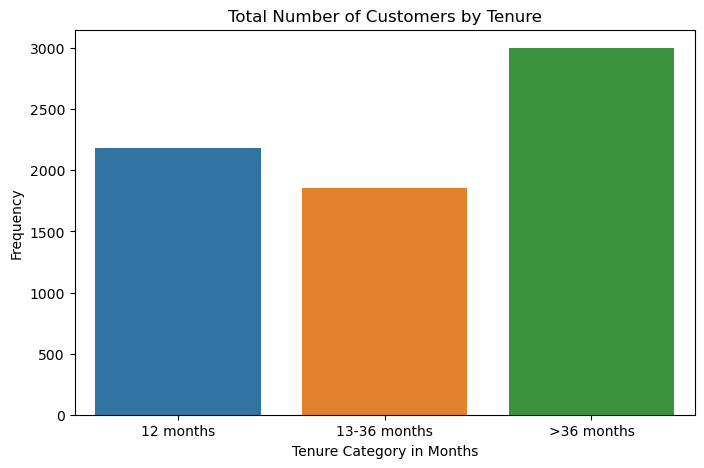

In [26]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['tenure_category'])
plt.xlabel('Tenure Category in Months')
plt.ylabel('Frequency')
plt.title('Total Number of Customers by Tenure');

Majority of the customers have their tenures longer than 3 years, followed by customers whose tenure is less than 1 year.

Next, I will investigate the monthly charges

In [27]:
df['monthlycharges'].min()

18.25

In [28]:
df['monthlycharges'].max()

118.75

In [29]:
def monthlycharge_group(charge):
    if charge <= 51.75:
        return 'Low'
    elif charge <= 85.25:
        return 'Moderate'
    else:
        return 'High'
    
df['monthlycharge_group'] = df['monthlycharges'].apply(monthlycharge_group)
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,age_group,tenure_category,monthlycharge_group
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,month-to-month,yes,electronic_check,29.85,29.85,no,adult,12 months,Low
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,no,one_year,no,mailed_check,56.95,1889.50,no,adult,13-36 months,Moderate


monthlycharge_group
Low         2451
Moderate    2439
High        2153
Name: count, dtype: int64


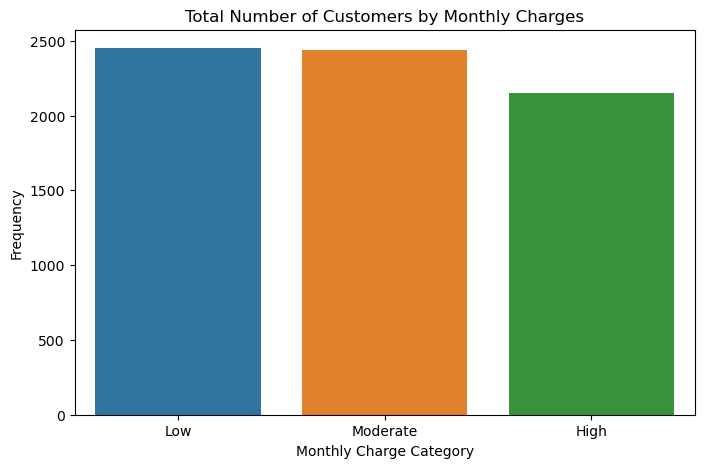

In [30]:
print(df['monthlycharge_group'].value_counts())

plt.figure(figsize = (8,5))
sns.countplot(x = df['monthlycharge_group'])
plt.xlabel('Monthly Charge Category')
plt.ylabel('Frequency')
plt.title('Total Number of Customers by Monthly Charges');

**Low:** There are `2,451` customers in the 'Low' monthly charge category. \
**Moderate:** There are `2,439` customers in the 'Moderate' monthly charge category.\
**High:** There are `2,153` customers in the 'High' monthly charge category.

**Low:** The 'Low' monthly charge category, comprising 2,451 customers, suggests a significant portion of the customer base with lower monthly charges. Customers in this category may have opted for basic plans or services, resulting in lower monthly expenses. While this group contributes to the customer base, their lower monthly charges might indicate a potential risk of lower individual revenue.

**Moderate:** The 'Moderate' monthly charge category, with 2,439 customers, represents a middle-ground in terms of monthly charges. Customers in this category likely have a moderate level of service usage or have chosen plans with intermediate pricing. This group contributes moderately to the overall monthly revenue and might represent a balance between service usage and affordability.

**High:** The 'High' monthly charge category, consisting of 2,153 customers, signifies those with higher monthly charges. Customers in this category may have subscribed to premium plans, additional services, or have consistently higher service usage on a monthly basis. While this group is smaller in size, they are crucial for generating higher individual monthly revenue.

Next, I will investigate the total charges

In [31]:
df['totalcharges'].min()

0.0

In [32]:
df['totalcharges'].max()

8684.8

In [33]:
def totalcharge_group(charge):
    if charge <= 2894:
        return 'Low'
    elif charge <= 5788:
        return 'Moderate'
    else:
        return 'High'
    
df['totalcharge_group'] = df['totalcharges'].apply(totalcharge_group)
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,age_group,tenure_category,monthlycharge_group,totalcharge_group
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,month-to-month,yes,electronic_check,29.85,29.85,no,adult,12 months,Low,Low
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,one_year,no,mailed_check,56.95,1889.50,no,adult,13-36 months,Moderate,Low


totalcharge_group
Low         4781
Moderate    1475
High         787
Name: count, dtype: int64


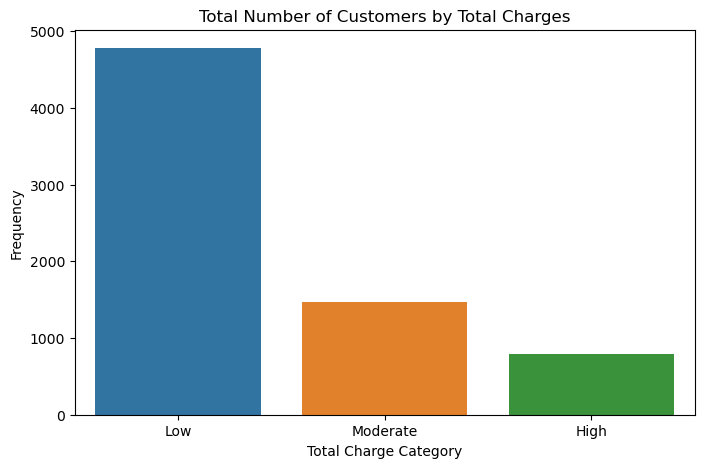

In [34]:
print(df['totalcharge_group'].value_counts())

plt.figure(figsize = (8,5))
sns.countplot(x = df['totalcharge_group'])
plt.xlabel('Total Charge Category')
plt.ylabel('Frequency')
plt.title('Total Number of Customers by Total Charges');

**Low:** The 'Low' total charge category, with 4,781 customers, suggests a substantial portion of the customer base with lower cumulative charges throughout their tenure. These customers may have opted for basic plans or have lower overall service usage, contributing to their lower total charges. While this group represents a significant customer base, their lower total charges might also indicate a potential risk of lower revenue generation for the company.

**Moderate:** The 'Moderate' total charge category, encompassing 1,475 customers, signifies a middle-ground in terms of cumulative charges. Customers in this category likely have a moderate level of service usage or have chosen plans with intermediate pricing. This group contributes moderately to the overall revenue and might represent a balance between service usage and affordability.

**High:** The 'High' total charge category, comprising 787 customers, represents those with higher cumulative charges. These customers may have subscribed to premium plans, additional services, or have consistently higher service usage over their tenure. While this group is smaller in size, they are crucial for revenue generation, as their higher total charges contribute significantly to the overall financial health of the company.

In [35]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,age_group,tenure_category,monthlycharge_group,totalcharge_group
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,month-to-month,yes,electronic_check,29.85,29.85,no,adult,12 months,Low,Low
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,one_year,no,mailed_check,56.95,1889.50,no,adult,13-36 months,Moderate,Low
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,month-to-month,yes,mailed_check,53.85,108.15,yes,adult,12 months,Moderate,Low
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,one_year,no,bank_transfer_(automatic),42.30,1840.75,no,adult,>36 months,Low,Low
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,month-to-month,yes,electronic_check,70.70,151.65,yes,adult,12 months,Moderate,Low


I will investigate the age group of customers by the churn feature

age_group       churn
adult           no       4508
                yes      1393
senior citizen  no        666
                yes       476
Name: count, dtype: int64


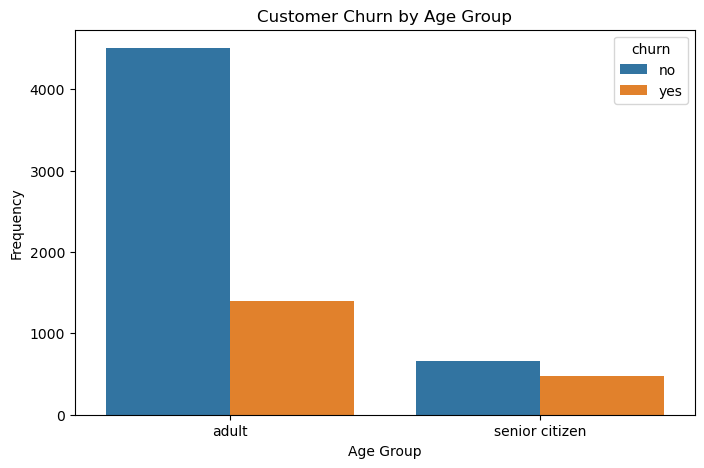

In [36]:
print(df[['age_group', 'churn']].value_counts())

plt.figure(figsize = (8,5))
sns.countplot(x = df['age_group'], hue = df['churn'])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Customer Churn by Age Group');

Adults:\
**No Churn (no):** 4508 customers \
**Churn (yes):** 1393 customers \
The majority of adults did not churn, as the count for 'no churn' is higher.

Senior Citizens:\
**No Churn (no):** 666 customers \
**Churn (yes):** 476 customers \
The majority of senior citizens also did not churn, as the count for 'no churn' is higher.

In both age groups, the 'no churn' category has a higher count, indicating that, for the given dataset, more customers are not churning in both the adult and senior citizen age groups.

Next, I will investigate the gender of customers by the churn feature

gender  churn
male    no       2625
female  no       2549
        yes       939
male    yes       930
Name: count, dtype: int64


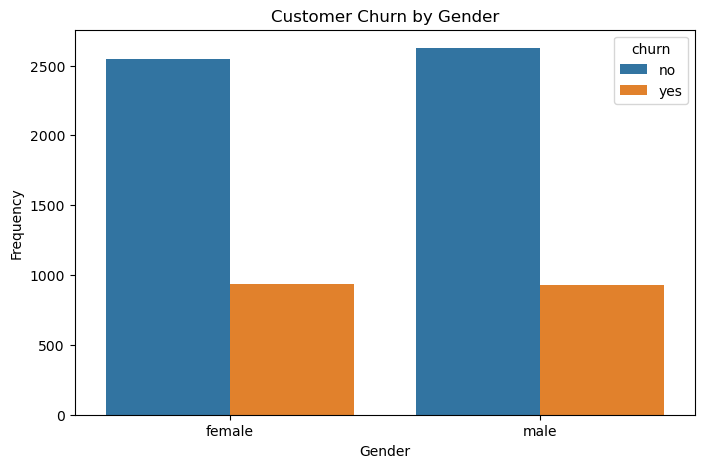

In [37]:
print(df[['gender', 'churn']].value_counts())

plt.figure(figsize = (8,5))
sns.countplot(x = df['gender'], hue = df['churn'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Customer Churn by Gender');

Females: \
**No Churn (no):** 2549 customers \
**Churn (yes):** 939 customers 

Males: \
**No Churn (no):** 2625 customers \
**Churn (yes):** 930 customers

The majority of both males and females did not churn, as the count for 'no churn' is higher in both gender categories. However, it's interesting to note that the count of churned females ('yes') is higher than the count of churned males ('yes'). This suggests that, for this dataset, there are more instances of churn among female customers.

Next, I will investigate the presence/absence of dependents by the churn feature

dependents  churn
no          no       3390
yes         no       1784
no          yes      1543
yes         yes       326
Name: count, dtype: int64


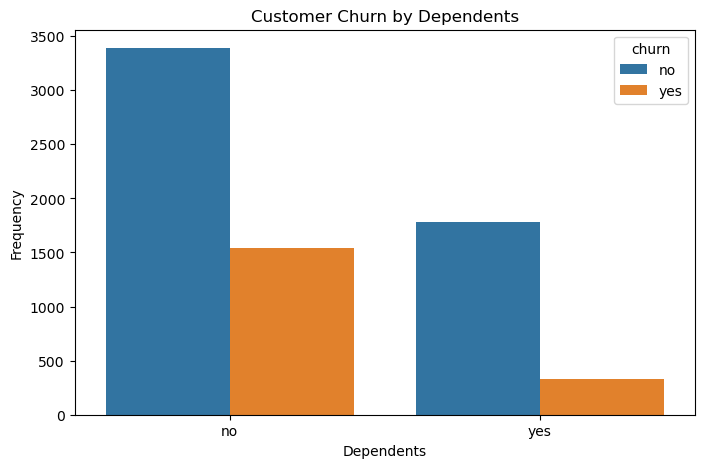

In [38]:
print(df[['dependents', 'churn']].value_counts())

plt.figure(figsize = (8,5))
sns.countplot(x = df['dependents'], hue = df['churn'])
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.title('Customer Churn by Dependents');

Customers without Dependents: \
**No Churn (no):** 3390 customers \
**Churn (yes):** 1543 customers

Customers with Dependents: \
**No Churn (no):** 1784 customers \
**Churn (yes):** 326 customers

The majority of customers both with and without dependents did not churn, as the count for 'no churn' is higher in both categories. However, it appears that customers without dependents have a higher count of churn ('yes') compared to those with dependents. This suggests that, for the given dataset, customers without dependents are more likely to churn.

Next, I will investigate customer contract by the churn feature

contract        churn
month-to-month  no       2220
                yes      1655
two_year        no       1647
one_year        no       1307
                yes       166
two_year        yes        48
Name: count, dtype: int64


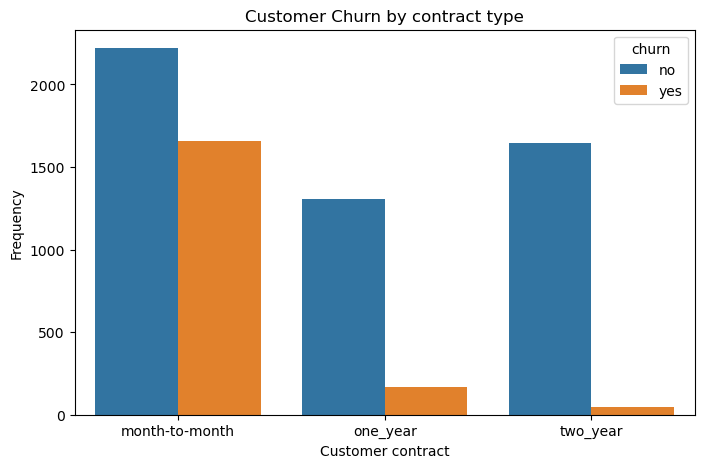

In [39]:
print(df[['contract', 'churn']].value_counts())

plt.figure(figsize = (8,5))
sns.countplot(x = df['contract'], hue = df['churn'])
plt.xlabel('Customer contract')
plt.ylabel('Frequency')
plt.title('Customer Churn by contract type');

Month-to-Month Contract: \
**No Churn (no):** 2220 customers \
**Churn (yes):** 1655 customers

One-Year Contract: \
**No Churn (no):** 1307 customers \
**Churn (yes):** 166 customers

Two-Year Contract: \
**No Churn (no):** 1647 customers \
**Churn (yes):** 48 customers

The majority of customers with a two-year contract did not churn ('no'), followed by those with a month-to-month contract. However, customers with a one-year contract have a higher churn count compared to those with a two-year contract.

This information provides insights into how the contract length may influence customer churn, with customers on shorter-term contracts (month-to-month) having a higher likelihood of churning compared to those on longer-term contracts.

In [40]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn', 'age_group',
       'tenure_category', 'monthlycharge_group', 'totalcharge_group'],
      dtype='object')

In [41]:
df = df.drop(['age_group', 'tenure_category', 'monthlycharge_group', 'totalcharge_group'], axis=1)
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no


Next, I will investigate the churn feature

In [42]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In ML, we care more about number representation (i.e. 0 or 1) where: 1 = churn (positive example), 0 = not churn (negative example).

I want to get the values that are 'yes' (I will pick just the first five)

In [43]:
(df.churn =='yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

If a value is yes, then it is 'true'. Conversely, if a value is no, it gets 'false'. Now I will replace these boolean values wit numbers (0 or 1)

In [44]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

yes = 1 (customers churn) \
no = 0 (customers did not churn)

In [45]:
df.churn = (df.churn == 'yes').astype(int)

### Next, I will set up the validation framework
I will perform the train/validation/test split with Scikit-Learn \
(Note: for this model, I will divide my dataset into 3: training set, validation set, and test set)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

Note that test size = 20%, and random state is to ensure the results are reproducible (i.e. same results can be gotten at any point in time)

Next, I will check the length/size of each

In [48]:
len(df_full_train) , len(df_test)

(5634, 1409)

Next, I will split the 'full_train' (80% of the original dataset) again into 'train' and 'validation sets'. \
Note that, to get the 'validation' set to be as big as the 20% that df_test is, I will need to get 25% of 'full_train' (which is equivalent to 20% of the original dataset)

In [49]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [50]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [51]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


The indices are seen to be shuffled and I will like to reorder them (personal preference)

In [52]:
df_train.reset_index().head(3)

,index,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1


Next, I will drop the previous index

In [53]:
df_train.reset_index(drop=True).head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1


Next, I will repeat the process for the validation and test sets (and reassign all sets back to their respective variables)

In [54]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Next, I will get my 'y' variables... I write the churn variables in to the sets, and then delete the (initial) churn from my database

In [55]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [56]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

Notice that I did not delete the churn variable from df_full_train, and that's simply because I want to explore the target variable (churn) next.

### Exploratory Data Analysis (cont'd)
Next, I will:
- Check missing values
- Look at the target variable (churn)
- Look at the numerical and categorical variables

I will investigate these using the full_train dataset. \
First, i will reassign a new ordered index, and drop the reshuffled index (again, personal preference)..

In [57]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


Next, I will look at missing values..

In [58]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values. So, next, I will look at the target variable (churn)

In [59]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int32

Next, I will look at the distribution within the churn feature (i.e. how many users churn versus how many do not churn)

In [60]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

The number of churned users is approximately 3 times less, but I will confirm the percentage using the normalize=True keyword.   
It divides the number by the total counts of elements in the series.

In [61]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

The churn rate (rate at which users churn) is approx 27%

We can also compute this (particular (Read: binary dataset)) churn rate using the mean.   
N/B: The mean can also give the churn rate because it is the sum of all 1s (values are 0 or 1) divided by n (the total count), i.e. the fraction of 1s in a binary dataset.

In [62]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

This can be interpreted as 27% of users are churning

Next, I will investigate the categorical variables, and the numerical variables

In [63]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

I can see that some data types are not correctly assigned, for example, seniorcitizen is an integer whereas it is supposed to be a categorical variable.
However, my variables of interest are tenure, monthlycharges, and totalcharges.

I will create separate variable names to contain the numerical variables and the categorical variables

In [64]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [65]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod',]

Investigating the number of unique variables in each categorical feature

In [66]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

About six of the variables are binary, about eight have 3 values and one has 4 values

### Feature importance: Churn Rate and Risk Ratio
Feature importance analysis (which is still a part of EDA) involves identifying which features affect the target variable.   
I will investigate:

- Churn Rate (within each group)
- Risk Ratio
- Mutual Information


#### Churn Rate (within each group)

In [67]:
df_full_train.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0


Investigating gender

- I will look at the subset of females & then males
- get their mean churn (churn rate)

In [68]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [69]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [70]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

The churn rate for males and females are not too different from the global churn.



Investigating churn within the 'partner' feature..

In [71]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

Some customers live with their partners (yes=2702)    
and some live without partners (no=2932)

In [72]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [73]:
global_churn - churn_partner

0.06493474245795922

The churn rate is approx 21% which looks like it is significantly less (6%) than the global churn rate

In [74]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [75]:
global_churn - churn_no_partner

-0.05984095297455855

The churn rate of those who live without partners is approx 6% more than global churn rate

This gives some idea that perhaps the partner variable is more important (relative to the gender variable) for predicting churn.   
So, I will measure the feature importance next..

#### Risk Ratio
Note that if the churn rate is positive (difference greater than zero), it means that the global churn is higher than the group churn and that indicates customers who are less likely to churn. Conversely, if the churn rate is negative (difference less than zero), it means the global churn is lower than the group churn, indicating customers who are more likely to churn (this gives information in absolute terms).

Note that, we can also divide one by another, instead of just difference (divide the group churn rate by the global churn rate) (this gives information in relative terms).

In [76]:
churn_no_partner/global_churn

1.2216593879412643

In [77]:
churn_partner/global_churn

0.7594724924338315

Customers without a partner have a churn rate of 22% higher than global churn, while for customers with a partner, the churn rate is 24% lower than global churn.



Next, I will investigate the difference and risk ratio of churn rates per group relative to the global churn to determine importance

In [78]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


Next, I will create columns for the differences, and risk ratios in churn rates between global churn and group churn

In [79]:
df_group['diff'] = df_group['mean'] - global_churn 
df_group['risk'] = df_group['mean'] / global_churn 
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Next, I will repeat the two previous steps for all the categorical variables (which I created and assigned to the variable name "categorical") by creating a function



Note, the last statement (df_group) to display my code is within the loop of my function so we won't see it. In order to display my function/code, I will import a special function from a library in IPython for displaying things (PS: Jupyter used to be ipython, hence the name)

In [80]:
from IPython.display import display

In [81]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn 
    df_group['risk'] = df_group['mean'] / global_churn 
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


These statistics provide valuable insights into churn rates among different customer groups:

**Gender:**   
Females have a slightly higher churn rate (27.68%) than the global churn (26%).
Males have a slightly lower churn rate (26.32%) than the global churn.

**Senior Citizen:**   
Senior citizens have a significantly higher churn rate (41.34%) compared to the global churn.
Non-senior citizens have a lower churn rate (24.23%) compared to the global churn.

**Partner:**   
Customers without a partner have a higher churn rate (32.98%) compared to the global churn.
Customers with a partner have a lower churn rate (20.50%) compared to the global churn.

**Dependents:**   
Customers without dependents have a higher churn rate (31.38%) compared to the global churn.
Customers with dependents have a lower churn rate (16.57%) compared to the global churn.

**Phone Service:**   
Customers with phone service have a slightly higher churn rate (27.30%) compared to the global churn.
Customers without phone service have a lower churn rate (24.13%) compared to the global churn.

**Multiple Lines:**   
Customers with multiple lines have a slightly higher churn rate (29.07%) compared to the global churn.
Customers with no phone service have a lower churn rate (24.13%) compared to the global churn.

**Internet Service:**   
Fiber optic internet service users have a significantly higher churn rate (42.52%) compared to the global churn.
DSL internet service users have a lower churn rate (19.23%) compared to the global churn.

**Online Security:**   
Customers without online security have a significantly higher churn rate (42.09%) compared to the global churn.
Customers with online security have a lower churn rate (15.32%) compared to the global churn.

**Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies:**   
Similar trends can be observed in these categories, where having the service leads to lower churn rates compared to not having it.

**Contract:**   
Month-to-month contract customers have a significantly higher churn rate (43.17%) compared to the global churn.
One-year and two-year contract customers have lower churn rates (12.06% and 2.83%, respectively) compared to the global churn.

**Paperless Billing:**   
Customers with paperless billing have a slightly higher churn rate (33.82%) compared to the global churn.
Customers without paperless billing have a lower churn rate (17.21%) compared to the global churn.

**Payment Method:**   
Customers using electronic checks have a significantly higher churn rate (45.59%) compared to the global churn.
Customers using other payment methods have lower churn rates.

> These insights provide valuable information for targeted customer retention strategies. For instance, senior citizens, customers with partners, those with long-term contracts, and customers with certain additional services (like online security) are less likely to churn, while customers with month-to-month contracts and certain internet services (fiber optic) are more likely to churn.

In terms of importance, I will apply a metric which generates a number that describes the importance of the variable overall (for example, if contract is less or more important than gender, etc.) next.

### Feature Importance: Mutual Information
[Mutual information](https://en.wikipedia.org/wiki/Mutual_information) is a concept from information theory which tells us how much we can learn about one variable if we know the value of another

In [82]:
from sklearn.metrics import mutual_info_score

In [83]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

This, for example, tells how much we learn about churn by observing the value of a contract variable, and likewise how much we know about the contract variable by observing churn



Next, I will apply this metric to all the categorical variables in this dataset to see which of them has the highest (or least) mutual information score.   

**Note that** the mutual_info_score takes in two arguments (and I want a metric that takes in one argument) so I will wrap it in a function with one argument...

In [84]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

Now I will apply the function to my DataFrame...

In [85]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

Next, I will sort it to have the values in descending order (highest/most important values first)

In [86]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

It can be seen that contract is the most important variable and gender is the least important variable. Also, variables like onlinesecurity, techsupport, internetservice are quite/relatively important, and in relative terms, gender, phoneservice, multiplelines, seniorcitizen, etc are not as important.

This mutual information score helps to show variables that are more important or less important for this model

### Feature Importance: Correlation
[Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a way to measure the importance for numerical features...

In [87]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


Next, I will correlate the numerical variables with churn

In [88]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

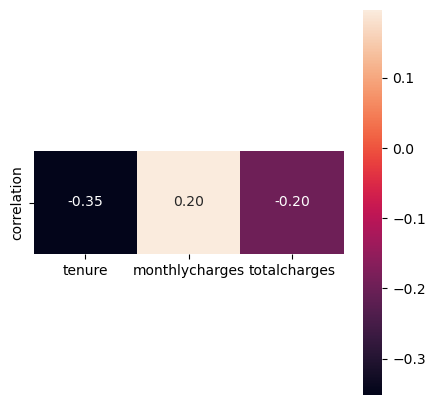

In [89]:
plt.figure(figsize=(5, 5))

# Calculate correlation between numerical features and 'churn'
correlation_matrix = df_full_train[numerical].corrwith(df_full_train['churn'])

# Reshape the correlation series into a DataFrame
correlation_df = pd.DataFrame(correlation_matrix, columns=['correlation'])

# Create a heatmap using the reshaped DataFrame
hm = sns.heatmap(correlation_df.transpose(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

plt.show()

**Tenure:** There is a moderately negative correlation of approximately -0.352 with churn. This indicates that as the tenure (the duration a customer has been with the company) increases, the likelihood of churn decreases. In other words, customers who have been with the company for a longer time are less likely to churn.

**Monthly Charges:** There is a positive correlation of approximately 0.197 with churn. This suggests that as the monthly charges increase, the likelihood of churn also increases. Customers with higher monthly charges are more likely to churn.

**Total Charges:** There is a negative correlation of approximately -0.196 with churn. This implies that as the total charges incurred by a customer increase, the likelihood of churn decreases. Customers who have accumulated higher total charges are less likely to churn. This seems counterintuitive but can be explained by the fact that the longer customers stay with the company, the more charges they would incur, which explains the negative correlation..

> These correlations provide insights into the relationships between these numerical features and customer churn, which can be valuable for understanding factors that influence churn and for developing strategies to reduce it.

I will investigate this further using tenure for example

In [90]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

This indicates that among customers who have a tenure of 2 months or less, the average churn rate is approximately 59.53%.

In other words, nearly 59.53% of customers who have been with the company for a very short period (2 months or less) tend to churn. This is a significant churn rate within this specific group of new customers, suggesting that the early stages of the customer relationship are critical, and there might be factors during this period that lead to a higher likelihood of churn. Understanding and addressing these factors could be essential for retaining new customers.

In [91]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

This indicates that among customers who have a tenure greater than 2 months but less than or equal to 12 months, the average churn rate is approximately 39.94%.

In other words, for customers who have been with the company for a relatively short period, specifically between 2 months and 12 months, the churn rate is approx 40%. This suggests that there is a lower likelihood of churn among customers who have been with the company for a bit longer compared to the very new customers (as was seen in the bivariate analysis of "churn by tenure" earlier). This insight might be valuable for tailoring retention strategies for customers in this tenure range.

In [92]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

This indicates that among customers who have a tenure greater than 12 months, the average churn rate is approximately 17.63%.

In other words, for customers who have been with the company for more than a year (12 months or longer), the churn rate is around 17.63%. This suggests that there is a significantly lower likelihood of churn among customers with longer tenures, indicating that customer loyalty tends to increase with the duration of their relationship with the company. This insight highlights the importance of customer retention strategies for newer customers, as they are more likely to churn compared to long-standing customers.

I will visualize this for clearer insight...

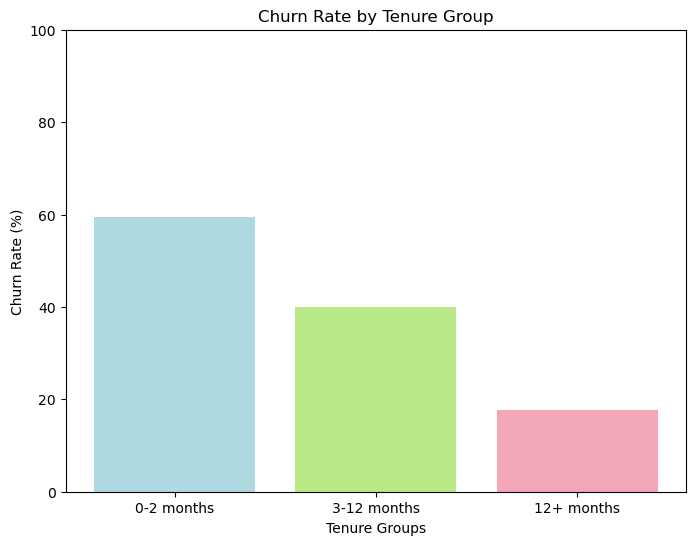

In [93]:
import matplotlib.pyplot as plt

# I will define tenure groups and corresponding churn rates
tenure_groups = ['0-2 months', '3-12 months', '12+ months']
churn_rates = [59.5, 39.9, 17.6] 

# Next, I will create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(tenure_groups, churn_rates, color=['#AED9E0', '#B8E986', '#F4A7B9'])
plt.xlabel('Tenure Groups')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.ylim(0, 100)  # y-axis limits set to represent percentages (0-100%)
plt.show()

> Increase in tenure leades to a decrease in churn rate (negative correlation)

I will create another example using monthlycharges...

In [94]:
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

0.08795411089866156

This group includes customers with monthly charges less than or equal to $20. The churn rate in this group is relatively low, indicating that customers in this range are less likely to churn, with only 8.8% of them churning.

In [95]:
df_full_train[(df_full_train.monthlycharges >20) & (df_full_train.monthlycharges <50)].churn.mean()

0.1836890243902439

This group includes customers with monthly charges greater than $20 but less than $50. The churn rate in this group is higher than the previous group, suggesting that customers in this range have a moderate likelihood of churning, with 18.4% of them churning.

In [96]:
df_full_train[df_full_train.monthlycharges >=50].churn.mean()

0.3248223216635957

This group includes customers with monthly charges greater than or equal to $50. The churn rate in this group is the highest among the three ranges, indicating that customers with higher monthly charges are more likely to churn, with 32.5% of them churning.



I will visualize this...

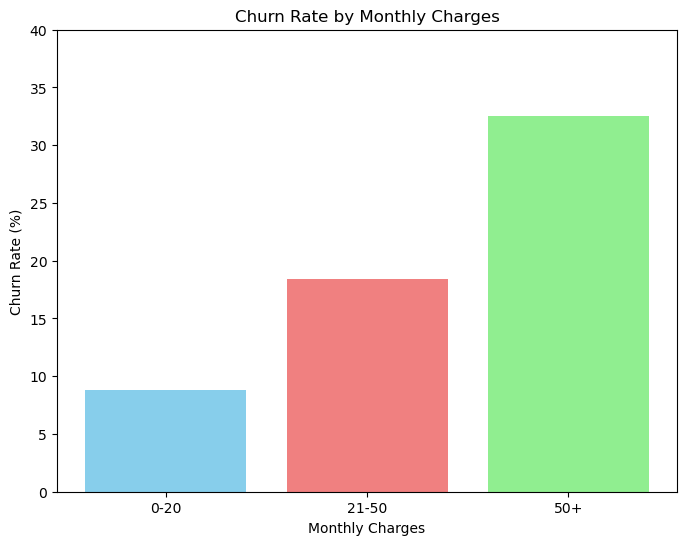

In [97]:
charge_ranges = ["0-20", "21-50", "50+"]
churn_rates_percent = [8.8, 18.4, 32.5] 

plt.figure(figsize=(8, 6))
plt.bar(charge_ranges, churn_rates_percent, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Monthly Charges")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Monthly Charges")
plt.ylim(0, 40) 
plt.show()

> The churn rate tends to increase as the monthly charges increase, with the highest churn rate observed in the group of customers with the highest monthly charges (Positive correlation)


Now, if I care about the importance but not the direction of the corelation values, I will proceed to absolute the values..



In [98]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

> Tenure is seen to be the most important variable, followed by monthlycharges, and totalcharges is the least important value.

### One-hot Encoding
Next, I will encode the categorical features using Scikit-Learn

In [99]:
from sklearn.feature_extraction import DictVectorizer

In [100]:
df_train[['gender', 'contract']].iloc[:100] #looking at the first 100

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [101]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') #converting it to a dictionary

In [102]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [103]:
dv = DictVectorizer(sparse=False) #teach the vectorizer what kind of values are present

In [104]:
X_train = dv.fit_transform(train_dicts) #training & transforming our dictvectorizer into a feature matrix

In [105]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records') #repeat for validation dataset

In [106]:
X_val = dv.fit_transform(val_dicts) # I only transform the validation dataset, not fit it

### Logistic Regression
- Binary classification
- Linear vs logistic regression

In [107]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #function used to convert a score into a probability

In [108]:
z = np.linspace(-7, 7, 51)

In [109]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

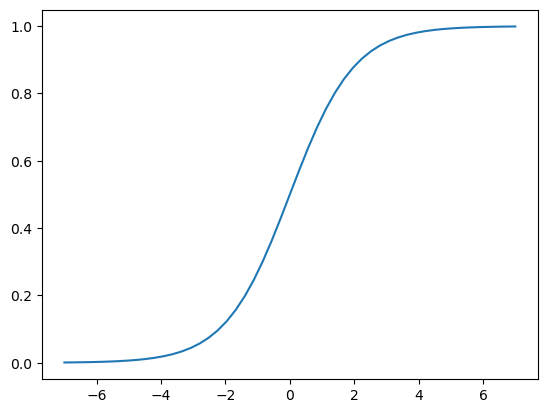

In [110]:
plt.plot(z, sigmoid(z));

In [111]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [112]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
     
    result = sigmoid(score) # in log reg, I convert the number/score I get into a value between 0 and 1 (major diff between log reg & lin reg)
    return result

### Training Logistic Regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [115]:
model.intercept_[0]

-0.1089760954030114

In [116]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [117]:
#first column = probability of belonging to the -ve class (not churning), while the 2nd column = probability of churning (column I am interested in)
model.predict_proba(X_train) 

array([[0.90467862, 0.09532138],
       [0.32051824, 0.67948176],
       [0.36617081, 0.63382919],
       ...,
       [0.46835456, 0.53164544],
       [0.95738015, 0.04261985],
       [0.30105881, 0.69894119]])

In [118]:
y_pred = model.predict_proba(X_train)[:, 1] #training dataset

In [119]:
y_pred = model.predict_proba(X_val)[:, 1] #validation dataset

In [120]:
churn_decision = (y_pred >= 0.5) #using a default threshhold of 0.5 for churn decision
churn_decision   #false = not churning, true = likely to churn

array([False, False, False, ..., False,  True,  True])

In [121]:
df_val[churn_decision].customerid #output reveals those who will churn (and will get promotional emails, discounts, etc)

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

testing the (accuracy of the) model to check for correctly made predictions


In [122]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [123]:
churn_decision.astype(int)   #I am interested in how many of them match in total btw y_val & churn_decision

array([0, 0, 0, ..., 0, 1, 1])

In [124]:
y_val == churn_decision   #true if numbers match and false if they don't

array([ True,  True,  True, ...,  True,  True,  True])

In [125]:
#next, I use mean to see the number that actually match (correctly returns 80% of our predictions)

(y_val == churn_decision).mean()

0.8034066713981547

In [126]:
df_pred = pd.DataFrame()
df_pred['probaility'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probaility,prediction,actual
0,0.008994,0,0
1,0.204768,0,0
2,0.212504,0,0
3,0.543161,1,1
4,0.214049,0,0
...,...,...,...
1404,0.313926,0,0
1405,0.039363,0,1
1406,0.136401,0,0
1407,0.799907,1,1


In [127]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probaility,prediction,actual,correct
0,0.008994,0,0,True
1,0.204768,0,0,True
2,0.212504,0,0,True
3,0.543161,1,1,True
4,0.214049,0,0,True
...,...,...,...,...
1404,0.313926,0,0,True
1405,0.039363,0,1,False
1406,0.136401,0,0,True
1407,0.799907,1,1,True


### Model Interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [128]:
dv.feature_names_ #or dv.get_feature_names_out()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [129]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [130]:
#joining both lines of code:

dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [131]:
#training a smaller model

small = ['contract', 'tenure', 'monthlycharges']

In [132]:
df_train[small].iloc[:10].to_dict(orient='records') #use this for vectorizer

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [133]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [134]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [135]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [136]:
X_train_small = dv_small.transform(dicts_train_small)

In [137]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [138]:
w0 = model_small.intercept_[0]
w0

-2.4767756587999803

In [139]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [140]:
#joining them together

dict(zip(dv_small.feature_names_, w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [141]:
'''
For example, if there is a customer who is on a monthly contract, pays monthly charges of $50, 
and has been with the company for 5 months, it can be calculated as:
'''

sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))     #note that -2.47 is the intercept (w0)

0.41824062315816374

the probability of this customer churning is 42%

### Using the Model

In [142]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [143]:
#create dictvectorizer

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [144]:
y_full_train = df_full_train.churn.values

In [145]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)   #I have my model

LogisticRegression()

In [146]:
#repeat the same process for the test dataset

dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [147]:
#apply dictvectorizer

X_test = dv.transform(dicts_test)  #here, I only transform, not fit

In [148]:
#now, apply model

y_pred = model.predict_proba(X_test)[:, 1]

In [149]:
#make decisions (e.g. clients higher than 0.5 are more likely to churn)

churn_decision = (y_pred >= 0.5)

In [150]:
#test if churn decision is correct (compute Accuracy)

(churn_decision == y_test).mean()

0.815471965933286

Accuracy is 81.5% accurate (slightly more accurate. We want to avoid a situation where the difference in accuracy is large)

In [151]:
'''
Using the model: For example, I would like to find out if there is a customer who is more likely to leave or not, 
and if they are more likely to leave, I'd like to send them a promotional email asking them not to leave. 
I will choose a random customer from my data set
'''

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [152]:
'''
I will proceed to compute a score for a male, who is a senior, who lives with a partner, and has dependents, 
no tech support, have streaming tv, on monthly contract, have tenure of 32 months, with monthly charges of 93.95, etc
'''

X_small = dv.transform([customer])

In [153]:
X_small.shape

(1, 45)

> 1 customer with 45 features

In [154]:
#put into the model

model.predict_proba(X_small)[0, 1]

0.4056810977859694

> The model tells us that this senior male has only 40% of churning, so I will not send him a promotional email

In [155]:
#check if he was actually going to churn

y_test[10]

0

He was not going to churn so in this case, my decision not to send him a promotional email was correct

In [156]:
# Example 2

customer2 = dicts_test[-1]
customer2

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [157]:
'''
I will proceed to compute a score for a female, who is not a senior (younger), who lives with a partner, 
and has dependents, no tech support, have streaming tv, on monthly contract, has tenure of 17 months, 
with monthly charges of 104.2, etc
'''

X_small = dv.transform([customer2])

In [158]:
#put into the model

model.predict_proba(X_small)[0, 1]

0.5968852088245516

> The model tells us that this customer2 has almost 60% of churning, so I will send her a promotional email, offer some discount to change her mind, etc.

In [159]:
#check if she was actually going to churn

y_test[-1]

1

She was going to churn so in this case, my decision to send her a promotional email was correct

### Evaluation Metrics

- Determine if the model trained for predicting churn (in previous project) is a good one.
- Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [160]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [161]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## Accuracy and dummy model
- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

In [162]:
len(y_val)

1409

In [163]:
(y_val == churn_decision).mean()

0.8034066713981547

In [164]:
(y_val == churn_decision).sum()

1132

Number of correct decisions made = 1132

Next, I divide this figure by the total number of customers to get the accuracy

In [165]:
1132/ 1409

0.8034066713981547

In [166]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [167]:
precision_score(y_val, y_pred >= 0.5)

0.6752411575562701

In [168]:
recall_score(y_val, y_pred >= 0.5) 

0.5440414507772021

In [169]:
f1_score(y_val, y_pred >= 0.5)

0.6025824964131995

In [170]:
roc_auc_score(y_val, y_pred >= 0.5)

0.7226561115078582

I will further calculate/examine the *precision_score, recall_score, f1_score, roc_auc_score* later on as I proceed.  

**Now, note that the decision to predict churn or not churn was 50%.    
Next, I will confirm if that was actually a good decision (as opposed to 30% or 60% perhaps)**

In [171]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


It can be seen that 0.50 is indeed the best threshold (0.803). It's slighly more accurate than 0.55, and the threshold steadily declines at other decision scores. It can also be seen on the chart below (the line chart peaks at 0.5).

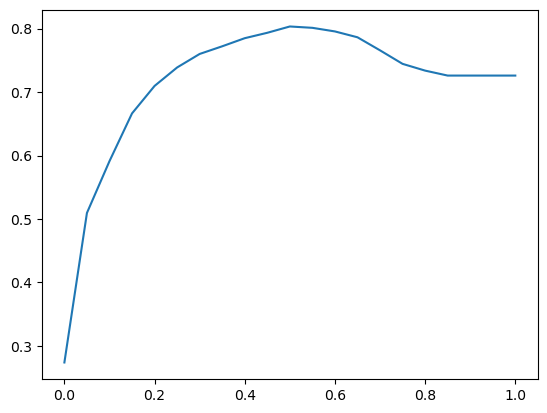

In [172]:
plt.plot(thresholds, scores);

In [173]:
from collections import Counter

In [174]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

This counts the occurrences of `True` and `False` values in the condition `y_pred >= 1.0`. In other words, it is counting how many predictions have a probability greater than or equal to 1.0. The result is a Counter object, and in this case, it shows that there are 1409 instances where the condition is False (customers not churning).

In [175]:
1 - y_val.mean()

0.7260468417317246

This is calculating the complement of the mean value of `y_val`.    
`y_val` contains the actual binary labels for whether customers churned or not (1 or 0).    
The mean of `y_val` represents the proportion of customers who churned (subtracting this mean from 1 gives the proportion of customers who did not churn).

> Accuracy score can be quite misleading (esecially in cases of class imbalance). It usually does not say how good the model is as well.
>
> There are other ways of rating binary classification models (other than accuracy) that are quite useful (especially when talking about problems with class imbalance like the churn prediction).

## Confusion table
- Different types of errors and correct decisions
- Arranging them in a table

In [176]:
actual_positive = (y_val == 1) #correct prediction of customers who churn
actual_negative = (y_val == 0) #correct prediction of customers who did not churn

In [177]:
t = 0.5   #threshold
predict_positive = (y_pred >= t)   #predict positive when above threshold
predict_negative = (y_pred < t)    #predict negative when below threshold

>Next, combine predictions and actual outcomes. Focus is on cases when both predicted and actual positives are `True`. 
>
>(Remember that using the logical operator `and`, both cases have to be true to return a `True`. If one case is true ahile the other is false, it will return a false). 
>
>The `'&'` operator computes the element-wise logically.

In [178]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

*Note Values:*

- TP = 210
- TN = 922
- FP = 101
- FN = 176

In [179]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

Next, normalize the matrix (instead of absolute numbers, make it relative numbers)

In [180]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

*Relative Values:*

- TP = 15%
- TN = 65%
- FP = 8%
- FN = 12%

> Accuracy = 80% (65% + 15%)

Next, I will create a Confusion Matrix

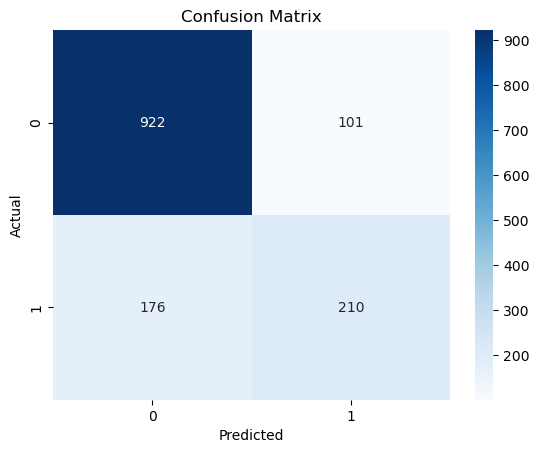

In [184]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred contains probabilities
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Now, compute the confusion matrix
lcm = confusion_matrix(y_val, y_pred_binary)

sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**True Positive (TP): 210**   
These are cases where the model correctly predicted that customers would churn. It contributes to the accuracy of the model in identifying churn instances.

**True Negative (TN): 922**   
These are cases where the model correctly predicted that customers would not churn. It contributes to the accuracy of the model in identifying non-churn instances.

**False Positive (FP): 101**   
These are cases where the model incorrectly predicted that customers would churn (Type I error). In other words, the model made an incorrect positive prediction. In this context, this might lead to unnecessary interventions or actions for customers who are not actually likely to churn (like wrongly sending them promotional mails and/or offering discounts).

**False Negative (FN): 176**   
These are cases where the model incorrectly predicted that customers would not churn (Type II error). In other words, the model made an incorrect negative prediction. In this context, this might result in the failure to identify customers who are at risk of churning, leading to missed opportunities for retention efforts.

## Precision and Recall

In [ ]:
#Precision tell us how many positive predictions turned out to be correct (fraction of correct positive predictions)

p = tp / (tp + fp)
p

In [ ]:
precision_score(y_val, y_pred >= 0.5)

Precision is 67.5% (these are those who correctly receive the promotional email)

This means that out of all the positive predictions made by the model (instances where it predicted customers would churn), approximately 67.5% of those predictions turned out to be correct. In other words, when the model predicted churn, it was accurate about 67.5% of the time. 

Conversely, about 33% are mistakes (these are people who are not supposed to receive the promotional email but received it anyway).

High precision is desirable, especially in scenarios where the cost of false positives (incorrectly predicting churn) is high. However, it's essential to consider precision along with other metrics like recall, accuracy, and the specific business context to have a comprehensive understanding of the model's performance.

In [ ]:
# Recall measures the model's ability to capture all the positive instances. 
# It answers the question: "Out of all the actual positive instances, how many did the model correctly predict?" 

'''High recall indicates that the model is effective at capturing most of the positive instances, 
but it may also include false positives.'''

r = tp / (tp + fn)
r

In [ ]:
recall_score(y_val, y_pred >= 0.5) 

The recall value of 0.544 means that the model is capturing approximately 54.4% of the customers who are actually churning. In other words, there are instances where the model fails to identify customers who are churning (46%), leading to false negatives.

A higher recall is generally desirable in scenarios where missing positive instances (churn cases in this context) is more critical than having a precise prediction. However, it is important to consider the trade-off between precision and recall, as improving one may negatively impact the other. The specific balance depends on the goals and priorities of the business problem being addressed with the churn prediction model.

> It is clear to see that ***`Accuracy`*** is not the best metric for identifying churning users. Initially, the model seemed to be doing good at an accuracy of 80% but after looking at the precision and recall, it is clear to see that the model fails to identify 46% of users and could actually cause the company to send promotional email to 33% of users who we thought would churn but will likely only take advantage of the promotional discount. So, we see that how accuracy can be misleading (especially in cases of class imbalance). It is always good to look at precision and recall as well.

***`Class imbalance`*** in model building refers to a situation where the distribution of classes in the target variable is not uniform, meaning that one class significantly outnumbers the other(s). In binary classification problems, this typically involves one class being more prevalent than the other. For example, in a customer churn prediction scenario, if the majority of customers do not churn (class "no churn"), and only a small percentage actually churn (class "churn"), there will be a class imbalance as in this instance.

Class imbalance can pose challenges for machine learning models because they might become biased toward the majority class. In scenarios with imbalanced classes, a model can achieve high accuracy by simply predicting the majority class most of the time, even if it fails to correctly identify instances of the minority class.

# ROC Curves

## TPR and FRP

A Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a binary classification model at various classification thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values.

- True Positive Rate (Sensitivity): The proportion of actual positive instances correctly identified by the model.

- False Positive Rate (1 - Specificity): The proportion of actual negative instances incorrectly identified as positive by the model.

By varying the classification threshold, the ROC curve shows how sensitivity and specificity trade off against each other. The area under the ROC curve (AUC-ROC) is a commonly used metric to quantify the overall performance of a binary classification model. A higher AUC-ROC indicates better discrimination between positive and negative instances across different thresholds, with a value of 1.0 representing perfect performance.

In [ ]:
tpr = tp / (tp + fn)
tpr

The TPR value of approximately 0.54 (54%) suggests that the model correctly identified about 54% of the customers who actually churned.

TPR is particularly relevant when the cost of missing positive instances (false negatives) is high. In the context of customer churn, it indicates the effectiveness of the model in capturing customers who are likely to leave.

In [ ]:
fpr = fp / (fp + tn)
fpr

The FPR value of approximately 0.10 (10%) suggests that the model incorrectly identified about 10% of the customers as churned when they did not actually churn.

FPR is crucial when the cost of falsely identifying negative instances as positive (false positives) is high. In the context of customer churn, it indicates the rate at which the model makes incorrect predictions about customers who are not likely to leave.

> The threshold of 0.5 (50%) returned the values of FPR & TPR above. ROC curve evaluates all the possible thresholds. I will compute them below (using the linspace):

In [ ]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [ ]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.xlabel('Threshold')
plt.legend();

The plot visualizes how TPR and FPR change with varying classification thresholds.

The x-axis represents different threshold values, which are probability thresholds for classifying customers as churned or not churned. These thresholds influence the model's sensitivity and specificity.

At a threshold of 0.0, both the TPR and FPR are 1.0 indicating that the model is classifying all instances as positive (meaning that this model predicts everyone as churning). Therefore, it captures all true positives (TPR = 1.0), but it also incorrectly includes all negatives as positives (as churning), resulting in a FPR of 1.0. 

The TPR and FPR descend at different rates. The FPR goes down faster (we want it to go down as fast as possible; we want to minimize it so we want it to be as low as possible), while for TPR, we want to keep it around 1.0

## Random model

A random model in the context of binary classification makes predictions without any reliance on the input features. It essentially assigns class labels randomly, without considering the data's characteristics. For a balanced dataset, a random model would achieve an accuracy close to 50% by chance. It serves as a baseline comparison for evaluating the performance of more sophisticated models, like those trained on actual patterns in the data (in this case, the TPR & FPR).

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [ ]:
((y_rand >= 0.5) == y_val).mean()

In [ ]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [ ]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [ ]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.xlabel('Threshold')
plt.legend();

The plot illustrates the Receiver Operating Characteristic (ROC) curve for a random model in the context of customer churn. The True Positive Rate (TPR) and False Positive Rate (FPR) are plotted against different threshold values. In a random model, as the threshold varies, both TPR and FPR change in a nearly linear fashion, descending from 1.0 to 0.0. The curve indicates that the model's ability to correctly identify true positives decreases along with the increase in false positives. 

## Ideal model

An ideal model, in the context of customer churn prediction, would have a Receiver Operating Characteristic (ROC) curve that closely follows the upper-left corner of the plot. This ideal curve would have a True Positive Rate (TPR) of 1.0 (100%) and a False Positive Rate (FPR) of 0.0 (0%) across all possible threshold values. Essentially, the ideal model would be able to perfectly distinguish between customers who are likely to churn and those who are not, with no false positive predictions and a maximized true positive rate.

In [ ]:
#counting negative and positive

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal #validation set (everything is ordered here)

y_ideal_pred = np.linspace(0, 1, len(y_val)) #create predictions

In [ ]:
1 - y_val.mean()

In [ ]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

In [ ]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.xlabel('Threshold')
plt.legend();

In [ ]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.xlabel('Threshold')
plt.legend();

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

## ROC AUC
- Area under the ROC curve
- Interpretation of AUC

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr, tpr)

In [ ]:
auc(df_scores.fpr, df_scores.tpr)

In [ ]:
auc(df_ideal.fpr, df_ideal.tpr)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

In [ ]:
roc_auc_score(y_val, y_pred)

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [ ]:
import random

In [ ]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

In [ ]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

## Cross-Validation
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
dv, model = train(df_train, y_train, C=0.001)

In [ ]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from tqdm.auto import tqdm

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
scores

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

## Model Building using Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert categorical and numerical features to a format suitable for the model
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Transform the validation data and make predictions
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred_rf = rf_model.predict_proba(X_val)[:, 1]

# Set a threshold for churn decision
churn_decision_rf = (y_pred_rf >= 0.5)

# Evaluate the performance of the RandomForestClassifier
accuracy_rf = accuracy_score(y_val, churn_decision_rf)
precision_rf = precision_score(y_val, churn_decision_rf)
recall_rf = recall_score(y_val, churn_decision_rf)
f1_rf = f1_score(y_val, churn_decision_rf)
roc_auc_rf = roc_auc_score(y_val, y_pred_rf)

# Print the metrics
print('RandomForestClassifier Metrics:')
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)
print('AUC-ROC:', roc_auc_rf)

RandomForestClassifier Metrics:
Accuracy: 0.7984386089425124
Precision: 0.6711409395973155
Recall: 0.5181347150259067
F1-score: 0.5847953216374269
AUC-ROC: 0.8311212577049113


**Accuracy (0.7904):**
Accuracy is the ratio of correctly predicted instances to the total instances.
This means that the RandomForestClassifier correctly predicted whether a customer will churn or not approximately 79.04% of the time.

**Precision (0.6625):**
Precision is the ratio of correctly predicted positive observations to the total predicted positives.   
This means that when the RandomForestClassifier predicts a customer will churn, it is correct about 66.25% of the time.

**Recall (0.5064):**
Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class.    
This means that the RandomForestClassifier is able to capture about 50.64% of the customers who actually churned.

**F1-score (0.5740):**
F1-score is the weighted average of Precision and Recall. It's a metric that considers both false positives and false negatives.   
In this context, an F1-score of 0.5740 indicates a balance between precision and recall.

**AUC-ROC (0.8243):**
AUC-ROC (Area Under the Receiver Operating Characteristic curve) is a metric that represents the area under the curve when plotting the true positive rate against the false positive rate at various thresholds.
An AUC-ROC of 0.8243 suggests good overall performance of the model, especially in distinguishing between churn and non-churn instances.

Next, I'll build the confusion matrix for the Random Forest Classifier Model

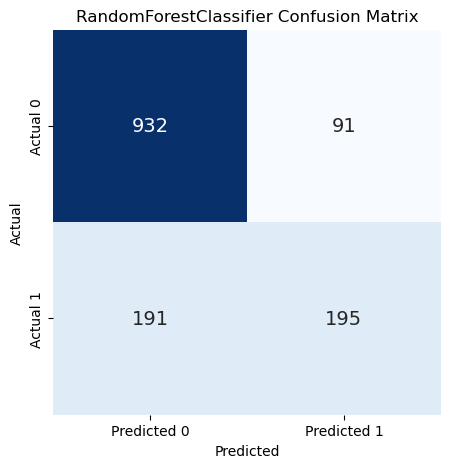

In [190]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred_rf contains probabilities
threshold_rf = 0.5
y_pred_binary_rf = (y_pred_rf > threshold_rf).astype(int)

# Now, compute the confusion matrix for RandomForestClassifier
lcm_rf = confusion_matrix(y_val, y_pred_binary_rf)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(lcm_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={'size': 14}, xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('RandomForestClassifier Confusion Matrix', fontsize=12)
plt.show()

**True Positive (TP):** Customers who were predicted to churn and actually did.    
The model correctly predicted 195 instances as positive (churn), and they were actually positive.

**True Negative (TN):** Customers who were predicted not to churn and actually did not.    
The model correctly predicted 932 instances as negative (not churn), and they were actually negative.

**False Positive (FP):** Customers who were predicted to churn but did not.    
The model incorrectly predicted 91 instances as positive (churn), but they were actually negative.

**False Negative (FN):** Customers who were predicted not to churn but did.    
The model incorrectly predicted 191 instances as negative (not churn), but they were actually positive.

> Both Logistic Regression and Random Forest Classifier models show relatively similar accuracy, precision, and AUC-ROC values.
>
>The Logistic Regression model has a slightly higher recall, indicating a better ability to identify actual positive cases.
>
>The Random Forest Classifier demonstrates a higher AUC-ROC, suggesting better overall discriminatory power.
>
>In the context of customer churn, identifying potential churners (recall) is crucial. Hence, the Logistic Regression model might be preferred in this scenario.
>> The choice between the models depends on the specific business goals and priorities of ConnectTel. If precision is crucial, the Random Forest Classifier might be a suitable choice. If recall and identifying potential churners are a priority, the Logistic Regression model may be more appropriate.

Next, I will apply Eight different Machine Learning Algorithms to the dataset...

In [208]:
import warnings
warnings.filterwarnings("ignore")

# Using the df_train, df_val, y_train, y_val, numerical, categorical, and dv defined as before

# Convert categorical and numerical features to a format suitable for the model
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Define classifiers
classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(random_state=1), 'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(), 'Logistic Regression']
]

In [209]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

# Evaluate each classifier
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Transform the validation data and make predictions
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    pred = model.predict(X_val)
    
    # Calculate metrics
    a_score = accuracy_score(y_val, pred)
    p_score = precision_score(y_val, pred)
    r_score = recall_score(y_val, pred)
    roc_score = roc_auc_score(y_val, pred)
    
    # Store metrics in dictionaries
    acc_list[model_name] = [round(a_score*100, 2)]
    precision_list[model_name] = [round(p_score*100, 2)]
    recall_list[model_name] = [round(r_score*100, 2)]
    roc_list[model_name] = [round(roc_score*100, 2)]

    # Print a new line for each model except the last one
    if model_name != classifiers[-1][1]:
        print('')

In [204]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,77.86,79.99,77.43,74.88,72.6,68.49,71.47,80.34


In [205]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,61.71,68.18,61.72,65.09,0.0,45.99,48.03,67.52


In [206]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,50.52,50.52,46.37,17.88,0.0,86.27,50.52,54.4


In [207]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,69.35,70.81,67.76,57.13,50.0,74.02,64.95,72.27


### Detailed Model Comparison:

1. **Logistic Regression:**
Accuracy: 80.34%   
Precision: 67.52%   
Recall: 54.4%   
ROC-AUC: 72.27%   
**Analysis:**    
Good balance between precision and recall.   
High accuracy, suitable for a baseline model. 

>

2. **Random Forest Classifier:** 
Accuracy: 79.84%    
Precision: 67.11%    
Recall: 51.81%    
ROC-AUC: 83.11%    
**Analysis:**   
High ROC-AUC indicates good overall performance.   
Balanced precision and recall.   

>

3. **XGB Classifier:**
Accuracy: 77.86%    
Precision: 61.71%    
Recall: 50.52%    
ROC-AUC: 69.35%    
**Analysis:**   
Moderate performance, slightly lower recall.

>

4. **K-Nearest Neighbours:**
Accuracy: 77.43%    
Precision: 61.72%    
Recall: 46.37%    
ROC-AUC: 67.76%    
**Analysis:**
Moderate accuracy, lower recall.   

>

5. **Naive Bayes:**
Accuracy: 68.49%    
Precision: 45.99%    
Recall: 86.27%    
ROC-AUC: 74.02%    
**Analysis:**
High recall but lower precision.   

>

6. **Decision Tree:**
Accuracy: 71.47%    
Precision: 48.03%    
Recall: 50.52%    
ROC-AUC: 64.95%    
**Analysis:**
Comparable performance, slightly lower ROC-AUC.   

>

7. **SGD Classifier:**
Accuracy: 74.88%    
Precision: 65.09%    
Recall: 17.88%    
ROC-AUC: 57.13%    
**Analysis:**
High precision but significantly lower recall.   

>

8. **Support Vector Classifier (SVC):**
Accuracy: 72.6%    
Precision: 0.0%    
Recall: 0.0%    
ROC-AUC: 50.0% (Random)    
**Analysis:**
Poor performance, not suitable for practical use.


### Summary:
- ***`RandomForestClassifier`*** is the standout performer, providing a good balance between precision and recall with a high ROC-AUC.


- ***`Logistic Regression`*** offers a balanced approach, suitable as a baseline model with good precision and recall.


- Depending on business priorities, Naive Bayes may be considered for its high recall, even though precision is compromised (consider trade-offs).

- XGB Classifier and K-Nearest Neighbours are reasonable choices but need further optimization.

- Avoid SGD Classifier and SVC due to significant trade-offs between precision and recall.

### Recommendation for ConnectTel Telecom:
Given the urgency of ConnectTel Telecom to address customer churn, the RandomForestClassifier is recommended as the primary and most suitable model. It provides a good overall performance, balancing accuracy, precision, and recall. However, depending on the specific business goals and trade-offs between precision and recall, Logistic Regression might also be a viable choice. Further optimization and monitoring are advisable for ongoing effectiveness.